# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

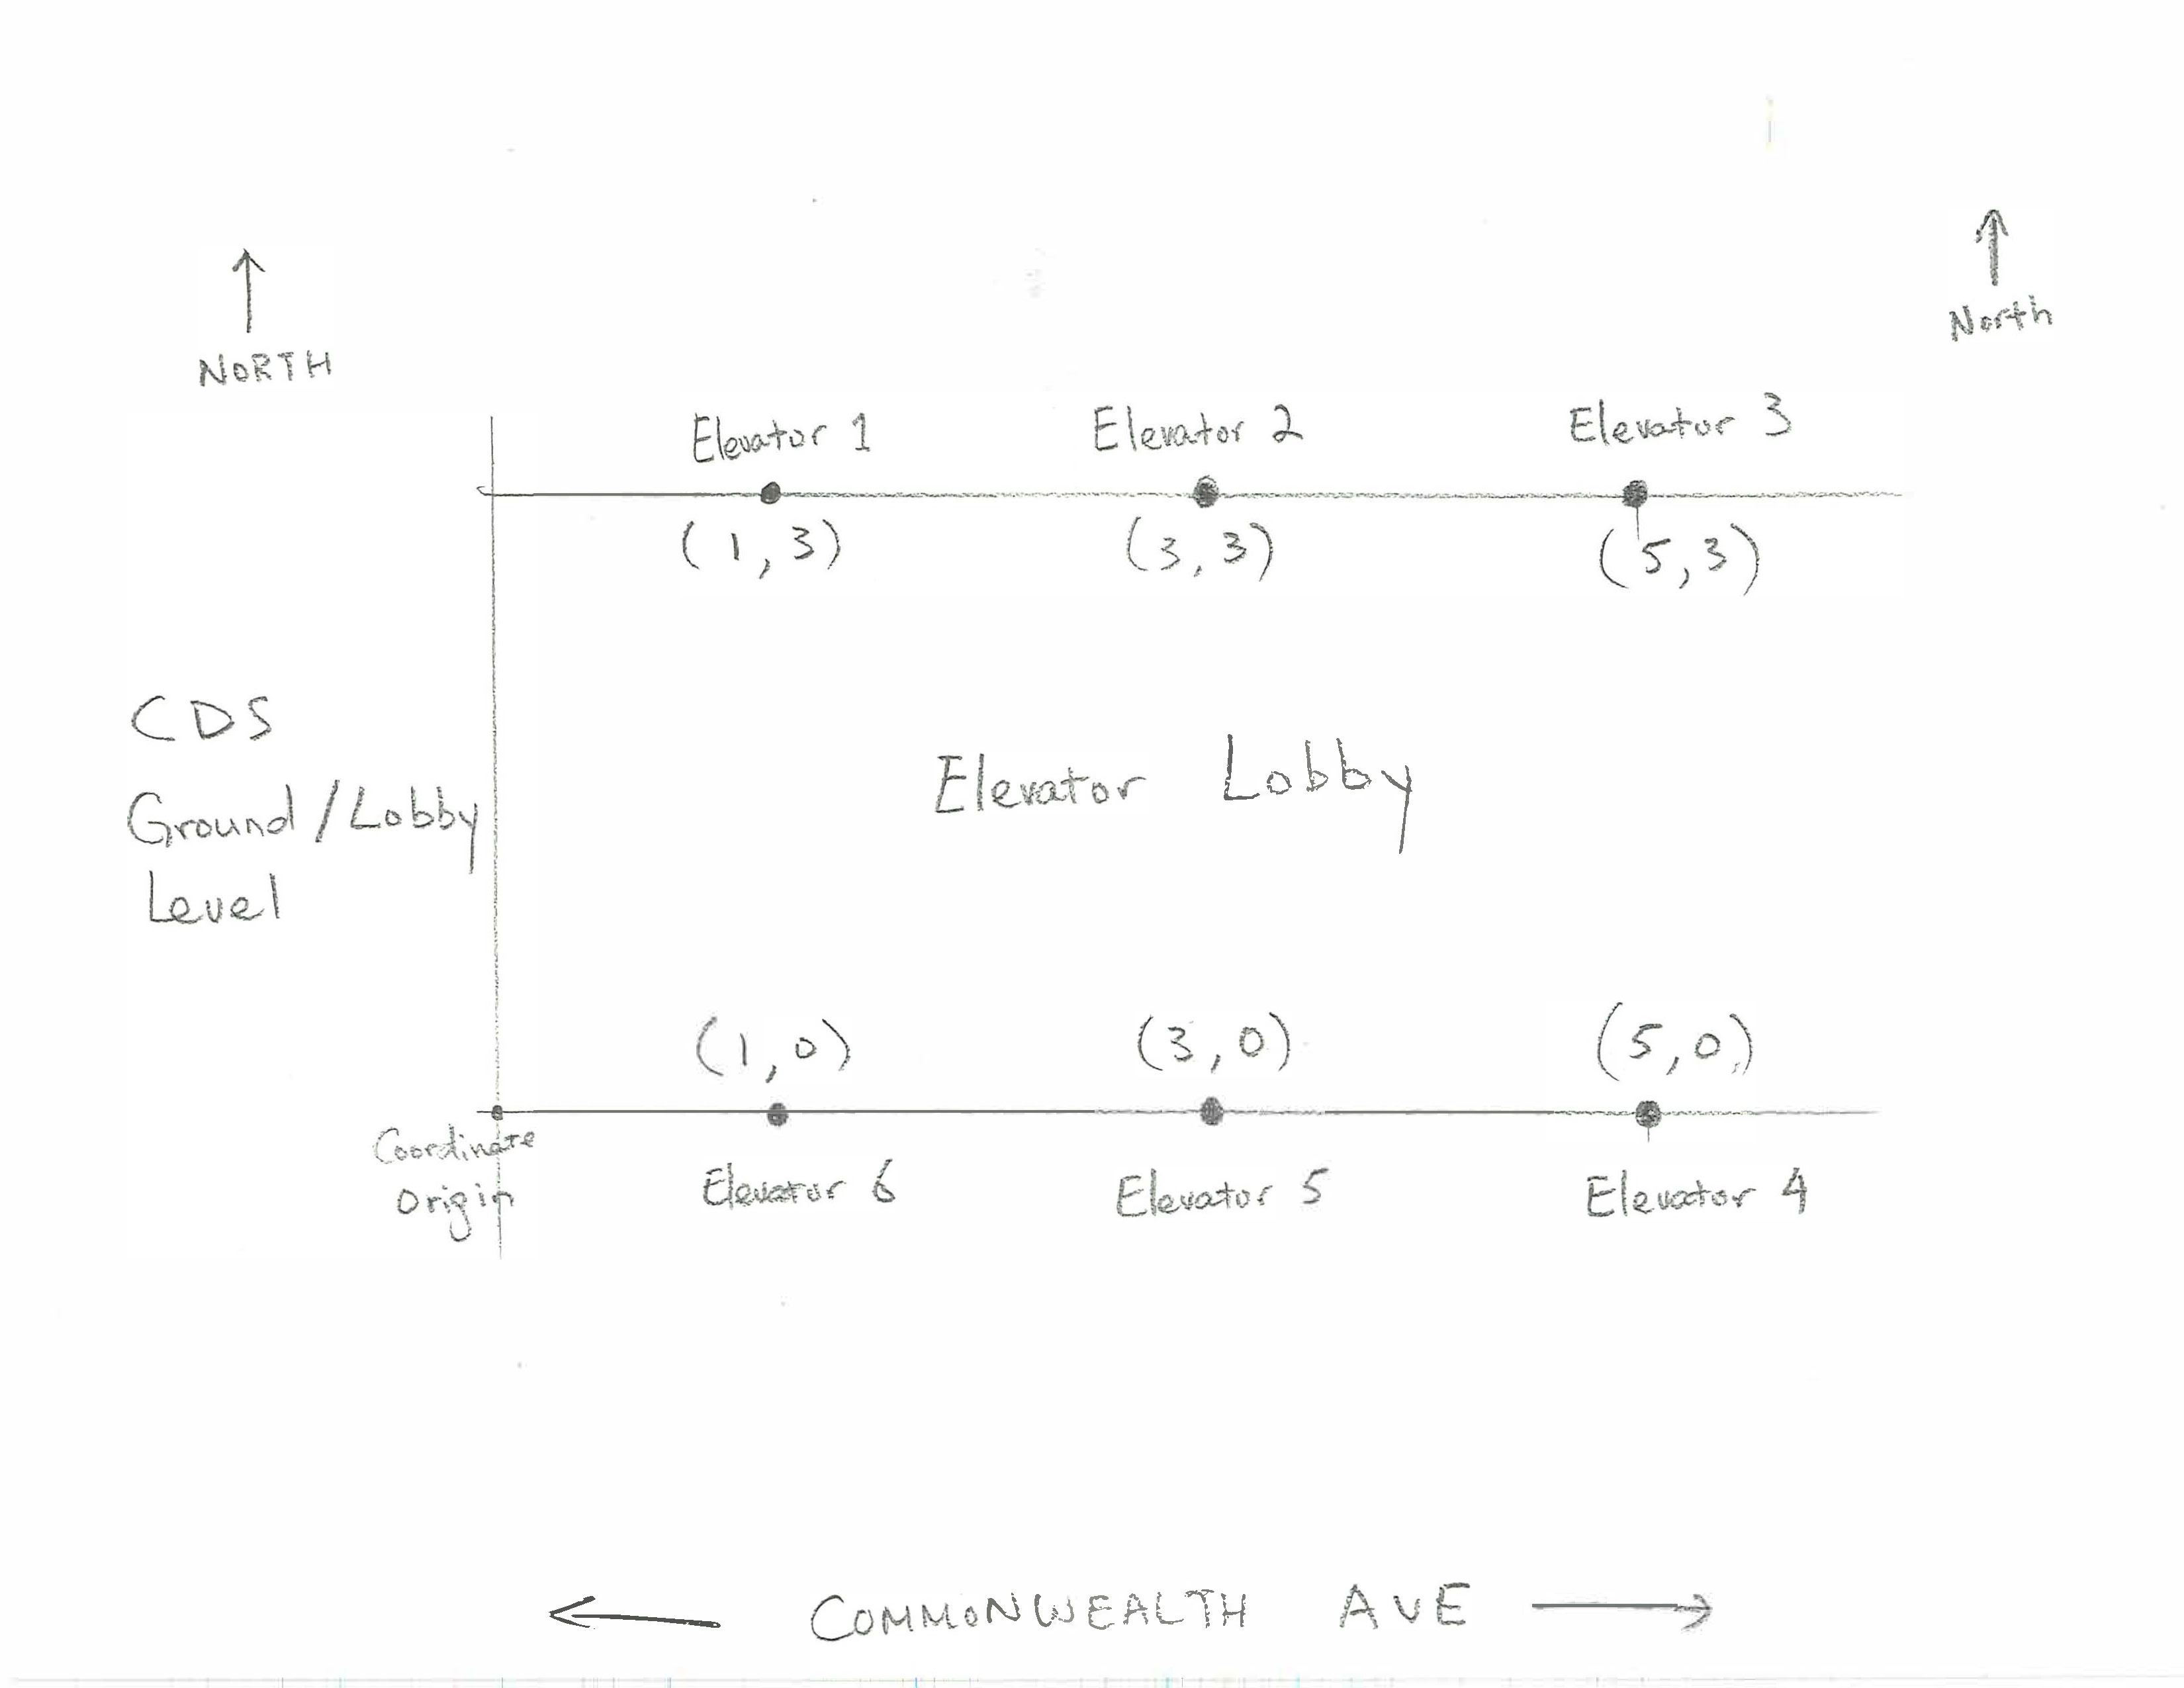

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:** TODO

Based on the diagram, it would make sense to stand on the coordinates (3, 1.5) right between elevator 2 (3,3) and elevator 5 (3,0). It is closest to these two elevators, and also same distance to elevator 1, 3, 4, 6. It is in the middle of these four elevators but closer to elevator 2 and 5, which makes the average distance to all elevators the shortest.

**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

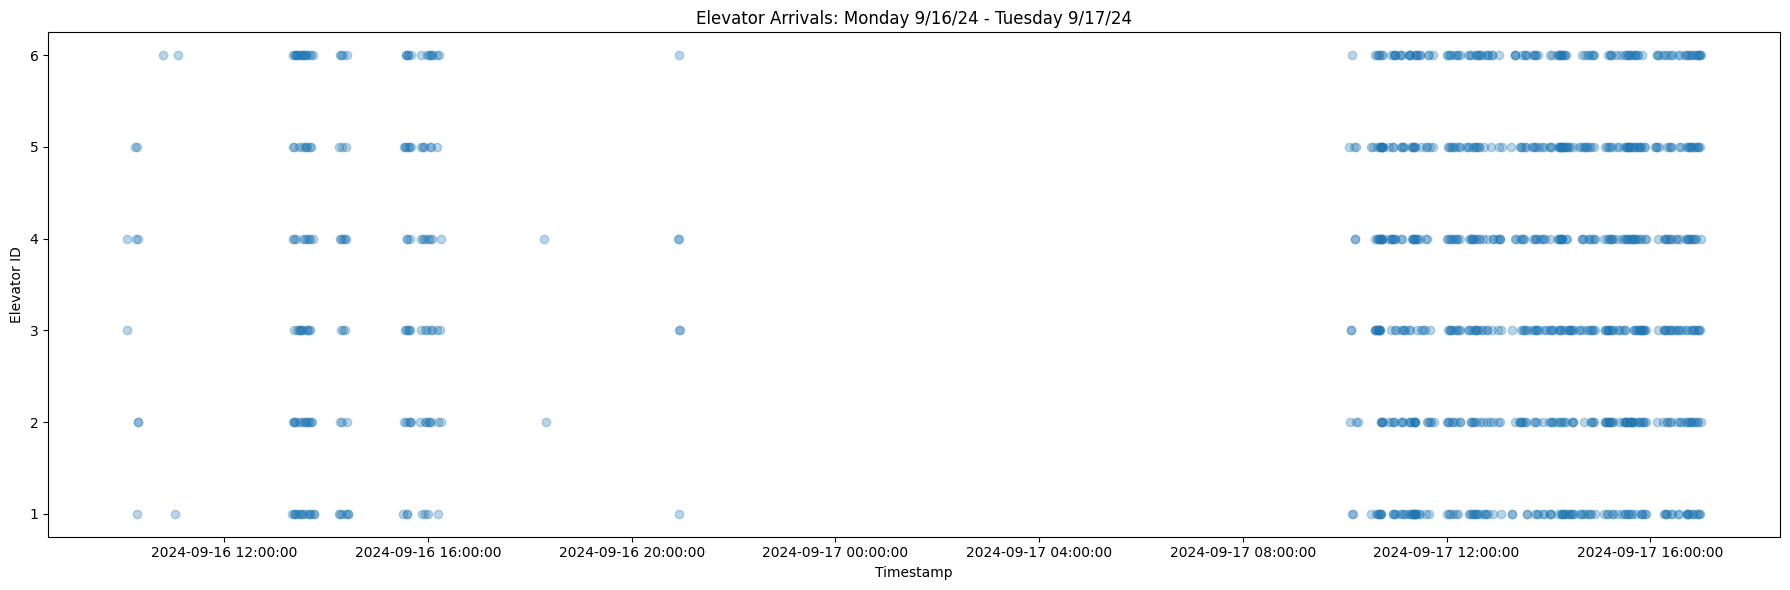

In [98]:
# Code for question 1:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

def make_plot():
    path = './arrivalsparttwo.csv'
    arrivalsData = pd.read_csv(path)
    
    arrivalsData['Timestamp'] = pd.to_datetime(arrivalsData['Timestamp']) # convert the Timestamp column to datetime format for pandas to plot
    arrivalsData['Elevator ID'] = pd.to_numeric(arrivalsData['Elevator ID'], errors='coerce') # ensure Elevator ID is numeric and not a string for pandas to plot
    
    plt.figure(figsize=(18, 6))
    plt.scatter(arrivalsData['Timestamp'], arrivalsData['Elevator ID'], alpha=0.3)
    plt.xlabel('Timestamp')
    plt.ylabel('Elevator ID')
    plt.title('Elevator Arrivals: Monday 9/16/24 - Tuesday 9/17/24')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.tight_layout()
    plt.show()

make_plot()


State observations here (briefly).

Although it might be hard to see, it seems that elevator id 3 and 4 are the most frequent elevators to arrive. Elevator id 1 and 6 are the least frequent elevators to arrive. There is no clear cyclical pattern. 

**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [99]:
def createTable():
    path = 'arrivalsparttwo.csv'
    data = pd.read_csv(path)

    data['Timestamp'] = pd.to_datetime(data['Timestamp']) # convert Timestamp column to datetime format
    data.sort_values('Timestamp', inplace=True) # sort data by Timestamp

    totalTime = (data['Timestamp'].max() - data['Timestamp'].min()).total_seconds() # total time spent on data collection 

    # find gaps in data collection (larger than a certain threshold like 30 minutes)
    data['Time_Diff'] = data['Timestamp'].diff().dt.total_seconds()
    thresholdGap = 30 * 60  # 30 minutes in seconds
    gapTime = data[data['Time_Diff'] > thresholdGap]['Time_Diff'].sum()
    effectiveTime = totalTime - gapTime

    arrivalCounts = data['Elevator ID'].value_counts() # number of arrivals for each elevator ID
    frequency = arrivalCounts / effectiveTime # average frequency (arrivals per second) for each elevator id

    tableData = {
        'Elevator ID': ['Total data collection time (seconds)', 'Number of arrivals', 'Average frequency (arrivals per second)'],
        1: [effectiveTime, arrivalCounts.get(1, 0), frequency.get(1, 0)],
        2: [effectiveTime, arrivalCounts.get(2, 0), frequency.get(2, 0)],
        3: [effectiveTime, arrivalCounts.get(3, 0), frequency.get(3, 0)],
        4: [effectiveTime, arrivalCounts.get(4, 0), frequency.get(4, 0)],
        5: [effectiveTime, arrivalCounts.get(5, 0), frequency.get(5, 0)],
        6: [effectiveTime, arrivalCounts.get(6, 0), frequency.get(6, 0)],
    }
    table = pd.DataFrame(tableData)
    return table

table = createTable()
table


,Elevator ID,1,2,3,4,5,6
0,Total data collection time (seconds),35309.00000,35309.000000,35309.000000,35309.000000,35309.00000,35309.000000
1,Number of arrivals,155.00000,162.000000,170.000000,168.000000,167.00000,159.000000
2,Average frequency (arrivals per second),0.00439,0.004588,0.004815,0.004758,0.00473,0.004503


**Answer:** TODO

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) | TODO | TODO | TODO | TODO | TODO |TODO |
| Number of arrivals | TODO | TODO | TODO | TODO | TODO |TODO |
| Average frequency (arrivals per second) | TODO | TODO | TODO | TODO | TODO |TODO |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

In [100]:
import pandas as pd
import numpy as np

def create_probabilities_table():
    path = 'arrivalsparttwo.csv'
    data = pd.read_csv(path)

    data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # convert Timestamp column to datetime and sort by Timestamp
    data.sort_values('Timestamp', inplace=True)

    totalTime = (data['Timestamp'].max() - data['Timestamp'].min()).total_seconds() # total time spent on data collection

    data['Time_Diff'] = data['Timestamp'].diff().dt.total_seconds() # find gaps in data collection (gaps larger than 30 minutes)
    thresholdGap = 30 * 60  # 30 minutes in seconds
    gapTime = data[data['Time_Diff'] > thresholdGap]['Time_Diff'].sum()
    effectiveTime = totalTime - gapTime


    arrivalCounts = data['Elevator ID'].value_counts() # number of arrivals for each elevator ID
    frequency = arrivalCounts / effectiveTime # frequency (arrivals per second) for each elevator
    totalFrequency = frequency.sum() # total frequency of all elevators 
    probabilities = frequency / totalFrequency # probabilities for each elevator

    # Prepare the data for the table
    probability_data = {
        'Elevator ID': ['Probability of being next elevator to arrive'],
        1: [probabilities.get(1, 0)],
        2: [probabilities.get(2, 0)],
        3: [probabilities.get(3, 0)],
        4: [probabilities.get(4, 0)],
        5: [probabilities.get(5, 0)],
        6: [probabilities.get(6, 0)],
    }
    probability_table = pd.DataFrame(probability_data)
    return probability_table

probabilityTable = create_probabilities_table()
probabilityTable


,Elevator ID,1,2,3,4,5,6
0,Probability of being next elevator to arrive,0.158002,0.165138,0.173293,0.171254,0.170234,0.16208


**Answer:** TODO

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | TODO | TODO | TODO | TODO | TODO |TODO |


**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


In [101]:
def findOptimalLocation():
    # coordinates for each elevator id based on the diagram provided
    elevatorCoords = {
        1: (1, 3),
        2: (3, 3),
        3: (5, 3),
        4: (5, 0),
        5: (3, 0),
        6: (1, 0),
    }

    # probilities of the next elevator id to arrive based on the data from question 4
    probabilities = {
        1: 0.158002,
        2: 0.165138,
        3: 0.173293,
        4: 0.171254,
        5: 0.170234,
        6: 0.16208
    }

    # optimal x and y coordinates to wait for the next elevator
    xOptimal = 0
    yOptimal = 0

    for elevatorID, coord in elevatorCoords.items():
        prob = probabilities[elevatorID]
        x, y = coord
        xOptimal += prob * x
        yOptimal += prob * y

    return (xOptimal, yOptimal)

optimalLocation = findOptimalLocation()
optimalLocation


(3.0489330000000003, 1.489299)

ANSWER: 
Using the code below, I used the data computed using question 4'code. question 4's code computes the probability of each elevator being the next to arrive. I used this data to calculate the expected distance to each elevator. Expected distance = sum of the product of the probability of each elevator arriving and the distance to that elevator. Elevator id with the smallest expected distance is the optimal location to wait for an elevator. The code calculates the expected distance to each elevator and finds the optimal location to wait for an elevator. Answer is (3.0489330000000003, 1.489299) which is closest to elevator 2 and 5.


**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [102]:
import pandas as pd
import numpy as np

elevatorCoords = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0),
}

def get_average_walk_distance(data, coordinate):
    '''
    data is a csv file containing the data.
    coordinate is the coordinate to wait at.
    '''
    waitingX, waitingY = coordinate
    totalDistance = 0
    numArrivals = 0
    
    # For each elevator arrival, calculate the distance to the waiting point
    for index, row in data.iterrows():
        elevatorID = row['Elevator ID']
        elevatorX, elevatorY = elevatorCoords[elevatorID]
        
        # Euclidean distance
        distance = np.sqrt((elevatorX - waitingX)**2 + (elevatorY - waitingY)**2)
        totalDistance += distance
        numArrivals += 1

    # Average distance
    average_walk_distance = totalDistance / numArrivals
    return average_walk_distance

data = pd.read_csv('arrivalsparttwo.csv')

# average walk distance for Question 1 location (3, 1.5)
average_distance_q1 = get_average_walk_distance(data, (3, 1.5))

# average walk distance for Question 5 location (3.0489330000000003, 1.489299)
average_distance_q5 = get_average_walk_distance(data, (3.0489330000000003, 1.489299))

print(average_distance_q1)
print(average_distance_q5)

2.1646279306829768
2.163995258056045


**Answer:** TODO

The average distance traveled to the next elevator arrival if I wait at the location specified in question 1 is 2.1646279306829768. The average distance traveled if I wait at the location specified in question 5 is 2.163995258056045. Average distance traveled is shorter if I wait at the location we found in question 5.


## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (Question 1) | TODO (copy from Question 6) |   TODO |
|Smart position (Question 5) | TODO (copy from Question 6) |   TODO |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:** It seems like the naive position (Question 1) is 2.164628 and the smart position (Question 5) is 2.163995 for the training data. For the test data, the naive position is 2.163793 and the smart position is 2.163506. The smart position is slightly better than the naive position. The smart position is closer to elevator 2 and 5, which are the elevators that arrive most frequently. The smart position is the optimal location to wait for an elevator. I did suceed in finding a good location to wait for the elevators since there is a slight difference between the naive and smart positions.

In [103]:
import pandas as pd
import numpy as np

# Coordinates for each elevator based on the diagram provided
elevator_coords = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0),
}

def get_average_walk_distance(data, coordinate):
    '''
    data is a csv file containing the data.
    coordinate is the coordinate to wait at.
    '''
    waitingX, waitingY = coordinate
    totalDistance = 0
    numArrivals = 0
    
    # For each elevator arrival, find distance to the waiting point
    for index, row in data.iterrows():
        elevatorID = row['Elevator ID']
        elevatorX, elevatorY = elevatorCoords[elevatorID]
        
        distance = np.sqrt((elevatorX - waitingX)**2 + (elevatorY - waitingY)**2)
        totalDistance += distance
        numArrivals += 1

    # Average distance
    average_walk_distance = totalDistance / numArrivals
    return average_walk_distance

# Load the test data and filter rows for arrivals after 9/18
testData = pd.read_csv('arrivalspartthree.csv')
testData['Timestamp'] = pd.to_datetime(testData['Timestamp'])
testDataFiltered = testData[testData['Timestamp'] >= '2023-09-18']

average_distance_q1_test = get_average_walk_distance(testDataFiltered, (3, 1.5)) # Naive location from Question 1: (3, 1.5)
average_distance_q5_test = get_average_walk_distance(testDataFiltered, (3.048933, 1.489299)) # Smart location from Question 5: (3.048933, 1.489299)

# Fill out the table
table = pd.DataFrame({
    "Average Distance Walked (m)": ["Naive position (Question 1)", "Smart position (Question 5)"],
    "Training Data": [average_distance_q1, average_distance_q5],
    "Test Data": [average_distance_q1_test, average_distance_q5_test]
})

table


,Average Distance Walked (m),Training Data,Test Data
0,Naive position (Question 1),2.164628,2.163793
1,Smart position (Question 5),2.163995,2.163506
